# Spell-checking using vcsn

This notebook shows how commands from Vcsn can be used to build a spell-checker (actually a spello-fixer).

We first build a minimal automaton (on $\mathbb{N}_\text{min}$) to represent a (finite) language.  To make it minimal, we built a codeterministic automaton, which we  determinize.

In [1]:
import vcsn
c = vcsn.context('lal_char, nmin')
lang = c.cotrie(filename='/usr/share/dict/words', format='words').determinize().strip()

[context.cotrie](context.cotrie.ipynb) returns an automaton on letterset.  The resulting automaton is quite compact: compare the number of states with the number of words and the total number of characters.

In [2]:
lang.info()

{'is codeterministic': False,
 'is complete': False,
 'is deterministic': True,
 'is empty': False,
 'is eps-acyclic': True,
 'is free': True,
 'is normalized': False,
 'is proper': True,
 'is standard': True,
 'is trim': True,
 'is useless': False,
 'is valid': True,
 'number of accessible states': 131164,
 'number of coaccessible states': 131164,
 'number of codeterministic states': 'N/A',
 'number of deterministic states': 'N/A',
 'number of final states': 15679,
 'number of initial states': 1,
 'number of lazy states': 0,
 'number of spontaneous transitions': 0,
 'number of states': 131164,
 'number of transitions': 289227,
 'number of useful states': 131164,
 'type': 'mutable_automaton<letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz)>, nmin>'}

In [3]:
# The number of words, and then the total number of letters.
!wc -lc /usr/share/dict/words

  235886 2493109 /usr/share/dict/words


Then we turn this automaton into a partial-identity transducer, i.e., each single-tape transition ($s \xrightarrow{\langle n \rangle a} s'$) is turned into a double-tape transition ($s \xrightarrow{\langle n \rangle a|a} s'$).  This is because we want to compose these automata.

In [4]:
lang2 = lang.partial_identity()
lang2.info()

{'is codeterministic': 'N/A',
 'is complete': 'N/A',
 'is deterministic': 'N/A',
 'is empty': False,
 'is eps-acyclic': True,
 'is normalized': False,
 'is proper': True,
 'is standard': True,
 'is trim': True,
 'is useless': False,
 'is valid': True,
 'number of accessible states': 131164,
 'number of coaccessible states': 131164,
 'number of codeterministic states': 'N/A',
 'number of deterministic states': 'N/A',
 'number of final states': 15679,
 'number of initial states': 1,
 'number of lazy states': 0,
 'number of spontaneous transitions': 0,
 'number of states': 131164,
 'number of transitions': 289227,
 'number of useful states': 131164,
 'type': 'mutable_automaton<lat<letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz)>, letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz)>>, nmin>'}

Now we build the Levenhstein automaton for the same context.

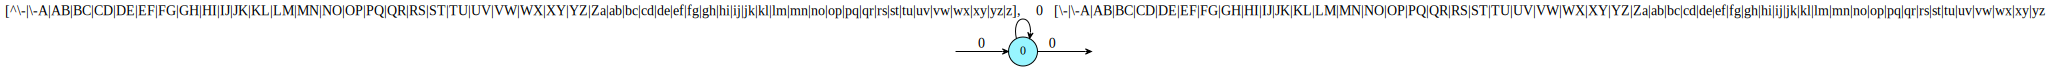

In [5]:
lev = lang2.context().levenshtein()
lev

Compose the Levenshtein automaton to the language transducer.  This results into a transducer which on the left-tape is accepting the language fuzzily, and on the second tape, features the exact words.

In [6]:
fixer = lev.compose(lang2).strip()
fixer.info()

{'is codeterministic': 'N/A',
 'is complete': 'N/A',
 'is deterministic': 'N/A',
 'is empty': False,
 'is eps-acyclic': True,
 'is normalized': False,
 'is proper': True,
 'is standard': False,
 'is trim': True,
 'is useless': False,
 'is valid': True,
 'number of accessible states': 131164,
 'number of coaccessible states': 131164,
 'number of codeterministic states': 'N/A',
 'number of deterministic states': 'N/A',
 'number of final states': 15679,
 'number of initial states': 1,
 'number of lazy states': 0,
 'number of spontaneous transitions': 0,
 'number of states': 131164,
 'number of transitions': 22569950,
 'number of useful states': 131164,
 'type': 'mutable_automaton<lat<letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz)>, letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz)>>, nmin>'}

For any candidate word, build the linear transducer that represents it.

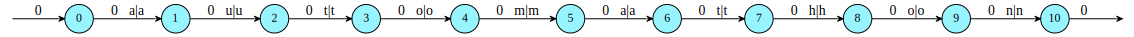

In [7]:
w = c.expression('automathon').automaton().partial_identity()
w

Now compose the word and the `fixer` to get a computation of the Levenstheim distance of `w` to any word on the language.

In [8]:
fix = w.compose(fixer)
fix.info()

{'is codeterministic': 'N/A',
 'is complete': 'N/A',
 'is deterministic': 'N/A',
 'is empty': False,
 'is eps-acyclic': True,
 'is normalized': False,
 'is proper': True,
 'is standard': True,
 'is trim': True,
 'is useless': False,
 'is valid': True,
 'number of accessible states': 2754434,
 'number of coaccessible states': 2754434,
 'number of codeterministic states': 'N/A',
 'number of deterministic states': 'N/A',
 'number of final states': 31358,
 'number of initial states': 1,
 'number of lazy states': 0,
 'number of spontaneous transitions': 0,
 'number of states': 2754434,
 'number of transitions': 14060199,
 'number of useful states': 2754434,
 'type': 'tuple_automaton<mutable_automaton<lat<letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz)>, letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz)>>, nmin>, focus_automaton<1, mutable_automaton<lat<letterset<char_letters(\\-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz

Display the proposed correction.

In [9]:
fix.lightest(1)

<1>automathon|automaton

Find the lightest path in this transducer: it maps our word to its closest word in the language.

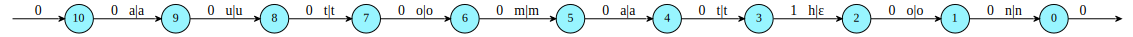

In [10]:
fix.lightest_automaton()

We can ask for several proposals of close words.

In [11]:
fix.lightest(10).project(1)

<3>automat + <3>autobahn + <3>automata + <3>autophon + <3>automatic + <2>automatin + <1>automaton + <3>automelon + <3>automotor + <2>autochthon